# Exam project: fetal health prediction

## About the dataset

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes: normal, subspect or pathological. Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

CTG interpretation helps in determining if the pregnancy is high or low risk. An abnormal CTG may indicate the need for further investigations and potential intervention.

In this project, I will create a model to classify the outcome of Cardiotocogram test to ensure the well being of the fetus.

Credits: Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

## Data collection and Preprocessing

### Importing libraries

!pip install imblearn is on requirements.txt

In [277]:
# Data management
import pandas as pd

# Other implementations
import numpy as np
import itertools
import random
import csv
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import warnings

# Data preprocessing and transformation
from sklearn import preprocessing
from sklearn.pipeline import Pipeline 
from imblearn.pipeline import Pipeline as IMBPipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.base import BaseEstimator
from scipy.stats import loguniform, beta
from imblearn.over_sampling import SMOTE, RandomOverSampler


warnings.filterwarnings('ignore')

### Loading data

In [278]:
data = pd.read_csv('fetal_health.csv', delimiter=';')

Print columns

In [279]:
data

baseline value  accelerations  fetal_movement  uterine_contractions  \
0               1200              0               0                     0   
1               1320              6               0                     6   
2               1330              3               0                     8   
3               1340              3               0                     8   
4               1320              7               0                     8   
...              ...            ...             ...                   ...   
2121            1400              0               0                     7   
2122            1400              1               0                     7   
2123            1400              1               0                     7   
2124            1400              1               0                     6   
2125            1420              2               2                     8   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                       0                     0                         0   
1                       3                     0                         0   
2                       3                     0                         0   
3                       3                     0                         0   
4                       0                     0                         0   
...                   ...                   ...                       ...   
2121                    0                     0                         0   
2122                    0                     0                         0   
2123                    0                     0                         0   
2124                    0                     0                         0   
2125                    0                     0                         0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                 730                                     5   
1                                 170                                    21   
2                                 160                                    21   
3                                 160                                    24   
4                                 160                                    24   
...                               ...                                   ...   
2121                              790                                     2   
2122                              780                                     4   
2123                              790                                     4   
2124                              780                                     4   
2125                              740                                     4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                   430       ...   
1                                                     0       ...   
2                                                     0       ...   
3                                                     0       ...   
4                                                     0       ...   
...                                                 ...       ...   
2121                                                250       ...   
2122                                                220       ...   
2123                                                200       ...   
2124                                                270       ...   
2125                                                360       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0               620           1260                         20   
1               680           1980                         60   
2               680           1980                         50   
3               530           1700                        110   
4               530           1700                   

See dimensions

In [280]:
data.shape

(2126, 22)

See all values

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   baseline value                                          2126 non-null   int64
 1   accelerations                                           2126 non-null   int64
 2   fetal_movement                                          2126 non-null   int64
 3   uterine_contractions                                    2126 non-null   int64
 4   light_decelerations                                     2126 non-null   int64
 5   severe_decelerations                                    2126 non-null   int64
 6   prolongued_decelerations                                2126 non-null   int64
 7   abnormal_short_term_variability                         2126 non-null   int64
 8   mean_value_of_short_term_variability                    21

To see full dataset characteristics

In [282]:
data.describe().T

count         mean  \
baseline value                                      2126.0  1333.038570   
accelerations                                       2126.0     2.966604   
fetal_movement                                      2126.0     8.244591   
uterine_contractions                                2126.0     4.158984   
light_decelerations                                 2126.0     1.825964   
severe_decelerations                                2126.0     0.003293   
prolongued_decelerations                            2126.0     0.158514   
abnormal_short_term_variability                     2126.0   469.901223   
mean_value_of_short_term_variability                2126.0    13.327846   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    98.466604   
mean_value_of_long_term_variability                 2126.0    81.876294   
histogram_width                                     2126.0   704.459078   
histogram_min                                       2126.0   935.794920   
histogram_max                                       2126.0  1640.253998   
histogram_number_of_peaks                           2126.0    40.682032   
histogram_number_of_zeroes                          2126.0     3.236124   
histogram_mode                                      2126.0  1374.520226   
histogram_mean                                      2126.0  1346.105362   
histogram_median                                    2126.0  1380.903104   
histogram_variance                                  2126.0   188.080903   
histogram_tendency                                  2126.0     3.203198   
fetal_health                                        2126.0    13.043274   

                                                           std     min  \
baseline value                                       98.408443  1060.0   
accelerations                                         3.730234     0.0   
fetal_movement                                       42.601601     0.0   
uterine_contractions                                  2.857581     0.0   
light_decelerations                                   2.880981     0.0   
severe_decelerations                                  0.057300     0.0   
prolongued_decelerations                              0.589948     0.0   
abnormal_short_term_variability                     171.928137   120.0   
mean_value_of_short_term_variability                  8.832413     2.0   
percentage_of_time_with_abnormal_long_term_vari...  183.968797     0.0   
mean_value_of_long_term_variability                  56.282466     0.0   
histogram_width                                     389.556930    30.0   
histogram_min                                       295.602123   500.0   
histogram_max                                       179.441831  1220.0   
histogram_number_of_peaks                            29.493856     0.0   
histogram_number_of_zeroes                            7.060594     0.0   
histogram_mode                                      163.812893   600.0   
histogram_mean                                      155.935963   730.0   
histogram_median                                    144.665889   770.0   
histogram_variance                                  289.776360     0.0   
histogram_tendency                                    6.108286   -10.0   
fetal_health                                          6.143768    10.0   

                                                       25%     50%     75%  \
baseline value                                      1260.0  1330.0  1400.0   
accelerations                                          0.0     1.0     5.0   
fetal_movement                                         0.0     0.0     2.0   
uterine_contractions                                   2.0     4.0     6.0   
light_decelerations                                    0.0     0.0     3.0   
severe_decelerations                                   0.0     0.0     0.0   
prolongued_decelerations                               0.0     0.0     0.0   


### Features of the dataset

In [283]:
print(data.columns)

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


Some labels were not properly written, so I used this method to rename them.

In [284]:
# Renaming some columns to make it easy to work with
data = data.rename(columns = {'baseline value': 'baseline_value', 'prolongued_decelerations': 'prolonged_decelerations'})
data.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

- 'baseline_value' FHR baseline (beats per minute)

- 'accelerations' Number of accelerations per second

- 'fetal_movement' Number of fetal movements per second

- 'uterine_contractions' Number of uterine contractions per second

- 'light_decelerations' Number of light decelerations per second

- 'severe_decelerations' Number of severe decelerations per second

- 'prolonged_decelerations' Number of prolonged decelerations per second

- 'abnormal_short_term_variability' Percentage of time with abnormal short term variability

- 'mean_value_of_short_term_variability' Mean value of short term variability

- 'percentage_of_time_with_abnormal_long_term_variability' Percentage of time with abnormal long term variability

- 'mean_value_of_long_term_variability' Mean value of long term variability

- 'histogram_width' Width of FHR histogram

- 'histogram_min' Minimum (low frequency) of FHR histogram

- 'histogram_max' Maximum (high frequency) of FHR histogram

- 'histogram_number_of_peaks' Number of histogram peaks

- 'histogram_number_of_zeroes' Number of histogram zeros

- 'histogram_mode' Histogram mode

- 'histogram_mean' Histogram mean

- 'histogram_median' Histogram median

- 'histogram_variance' Histogram variance

- 'histogram_tendency' Histogram tendency

- 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological), this is our target column

### Missing values

Since in my original dataset there were no missing values, I wanted to modify it to add complexity. I created this script in python, to wich I assign some columns from which I want to remove values. The idea is that at random, with a certain probability, the algorithm eliminates values in those columns. By looking at the dataset I could notice that a column, 'histogram_min', was not directly usefull for the final prediction, so I decided to insert a grater amount of missing values, so that I could drop the entire colum.

In [285]:
# columns on which you want to introduce missing values
columns_to_modify = ['histogram_width', 'histogram_number_of_peaks','histogram_max']

# probability of introducing missing value
probability = {'histogram_width': 0.1, 'histogram_number_of_peaks': 0.1,'histogram_max':0.2}

# introduce missing values
for column in columns_to_modify:
    data[column] = data[column].apply(lambda x: np.nan if np.random.rand() < probability[column] else x)

#save to output
data.to_csv("output_file.csv")

In [286]:
data.isnull().sum()

baseline_value                                              0
accelerations                                               0
fetal_movement                                              0
uterine_contractions                                        0
light_decelerations                                         0
severe_decelerations                                        0
prolonged_decelerations                                     0
abnormal_short_term_variability                             0
mean_value_of_short_term_variability                        0
percentage_of_time_with_abnormal_long_term_variability      0
mean_value_of_long_term_variability                         0
histogram_width                                           221
histogram_min                                               0
histogram_max                                             412
histogram_number_of_peaks                                 189
histogram_number_of_zeroes                                  0
histogra

To see the missing values

<AxesSubplot: >

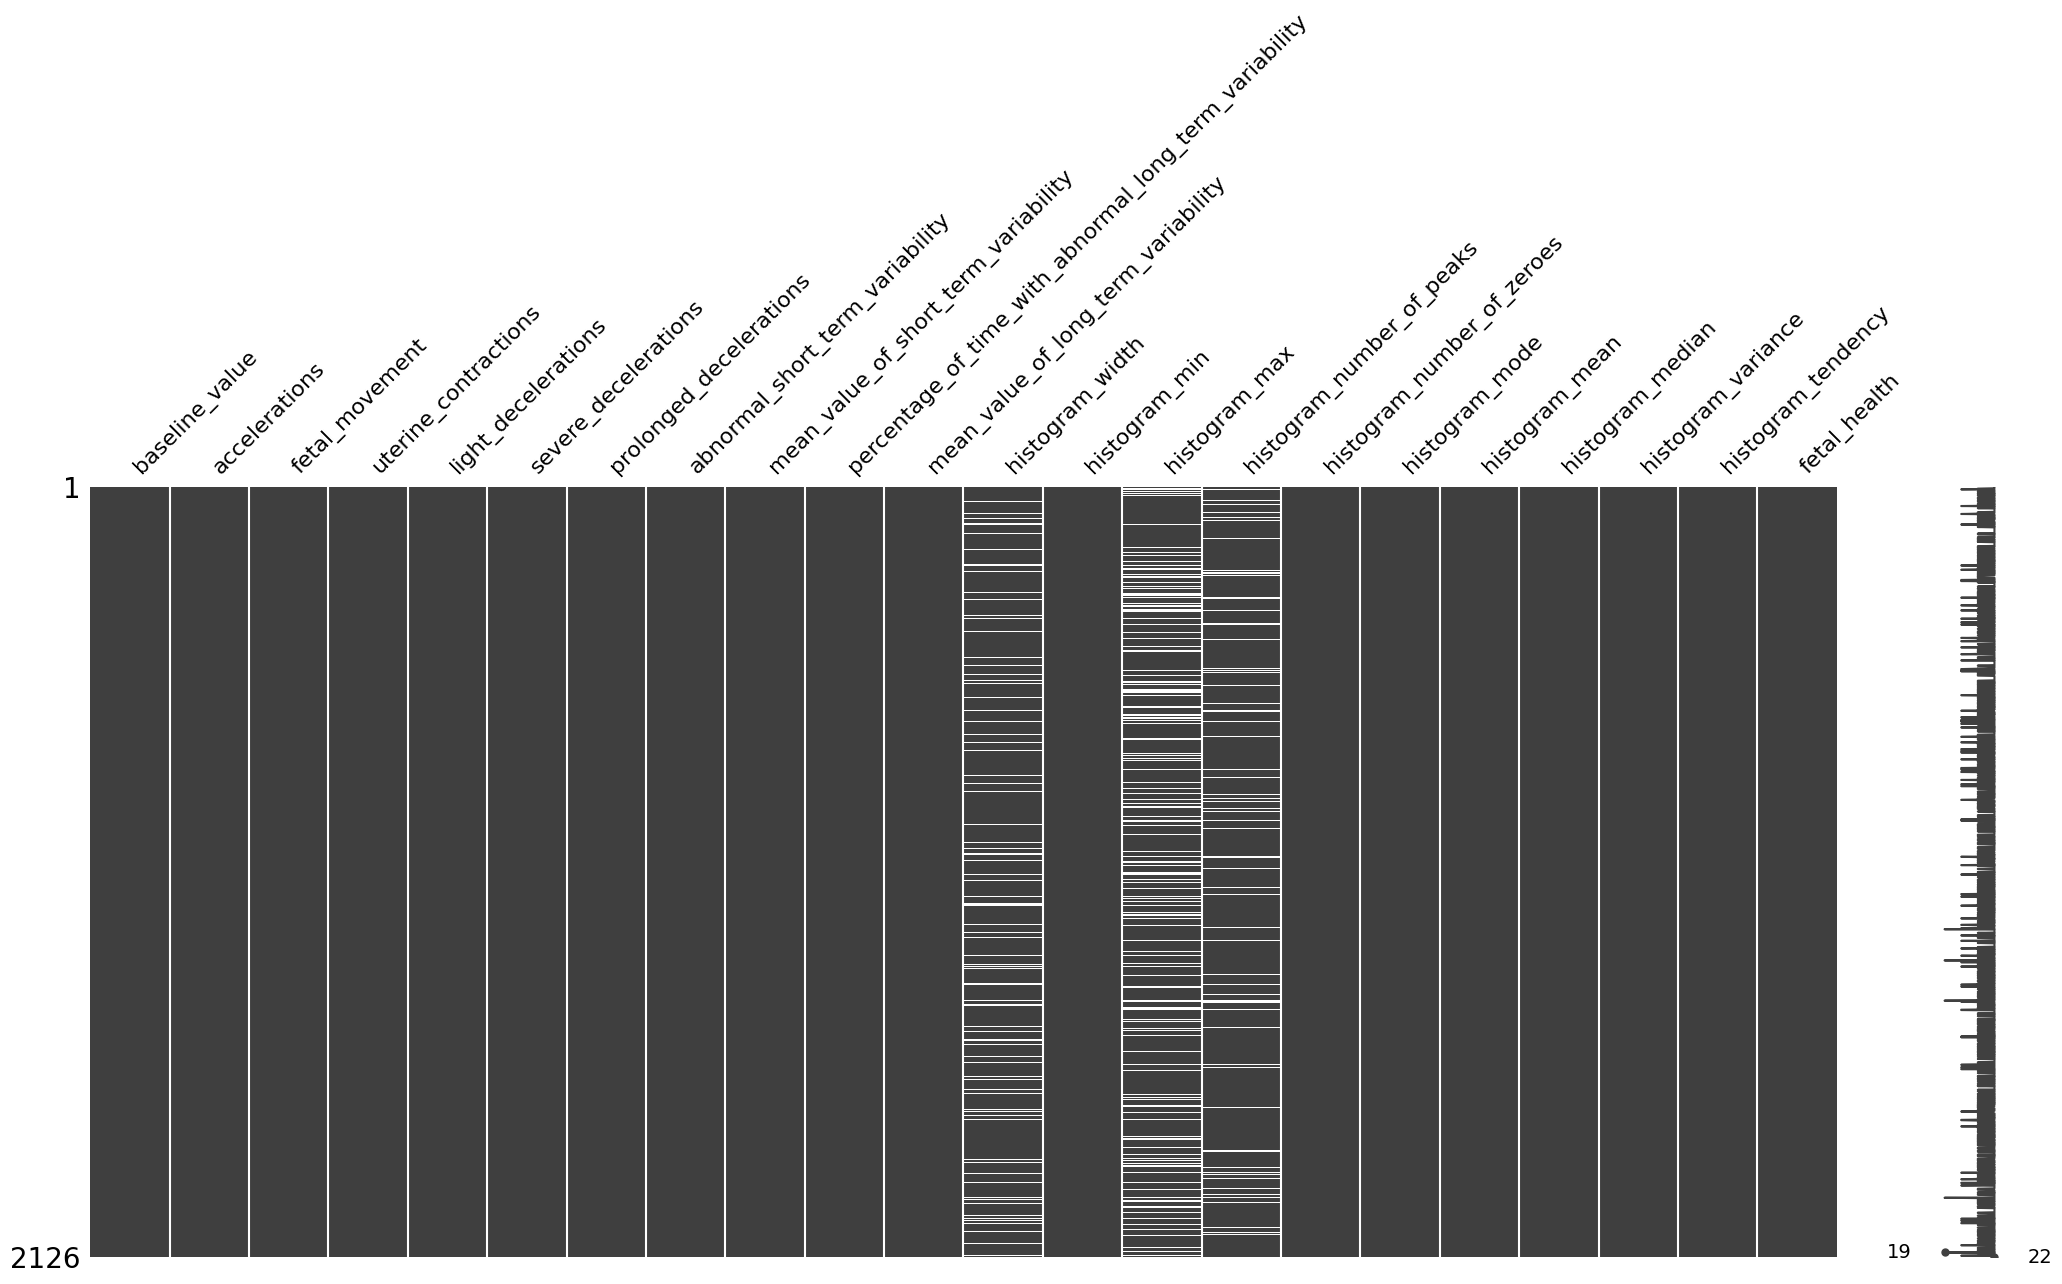

In [287]:
msno.matrix(data)

From this plot we have to keep in mind that for sure, we are going to drop the 'histogram_max' column later on

## Exploratory Data Analysis (EDA)

### Analysis of target distribution

As target column I identified the 'fetal_health' one, hence I started an analysis on it

<AxesSubplot: xlabel='fetal_health', ylabel='count'>

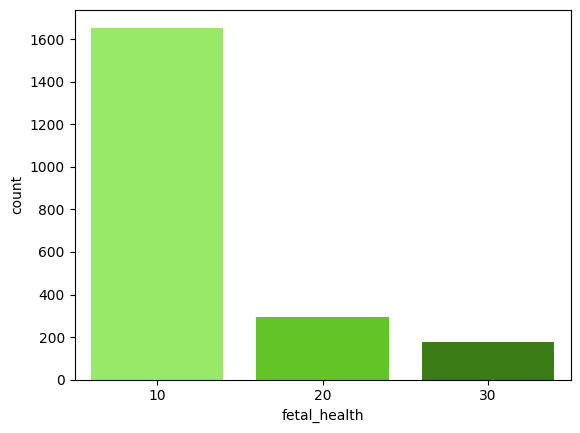

In [288]:
#first of all let us evaluate the target and find out if our data is imbalanced or not

colours=["#94FE53","#5CDE0D", "#388D05"]
sns.countplot(data= data, x="fetal_health",palette=colours)

Now we have an idea of  the values in our target column. The count plot of targets indicates an imbalance in data. 

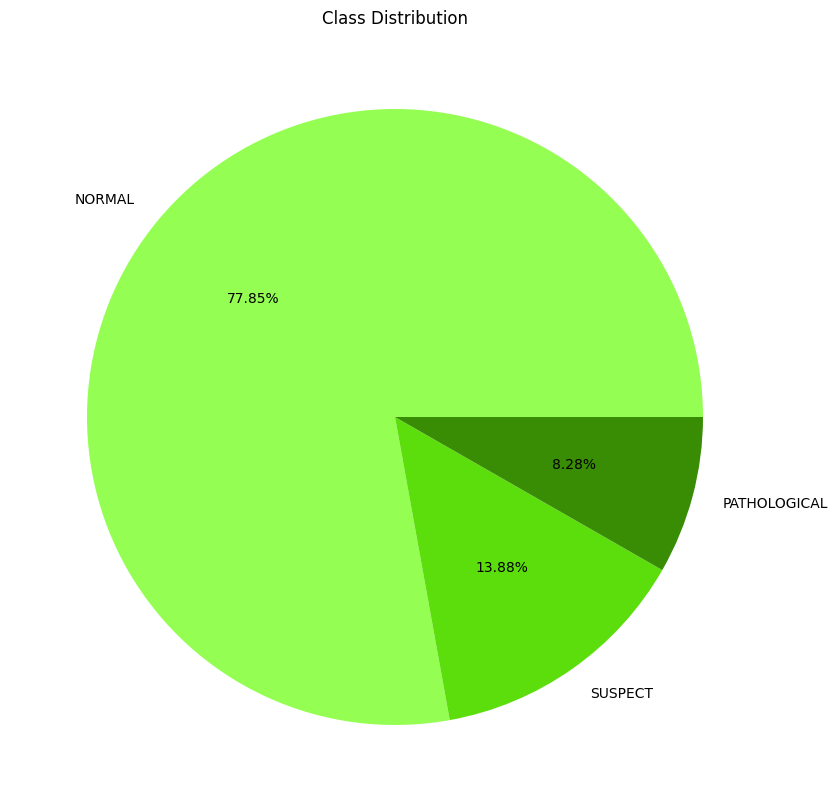

In [289]:
plt.figure(figsize=(10, 10))

plt.pie(
    data['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels=["NORMAL", "SUSPECT", "PATHOLOGICAL"],
    colors= colours
)

plt.title("Class Distribution")
plt.show()

In [290]:
#printing a table containing some statistics
pd.DataFrame(data["fetal_health"].describe()) 

fetal_health
count   2126.000000
mean      13.043274
std        6.143768
min       10.000000
25%       10.000000
50%       10.000000
75%       10.000000
max       30.000000

### Outliers detection

It's now the case to highlite and point out the outliers with respect to the target column thanks to this plot.

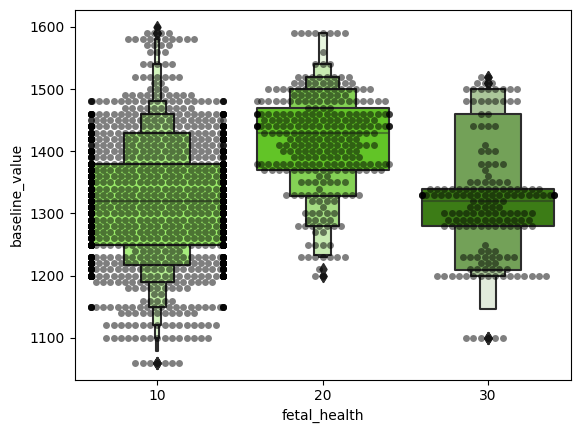

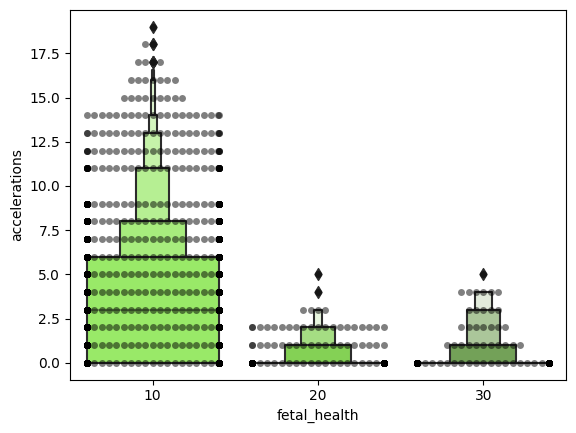

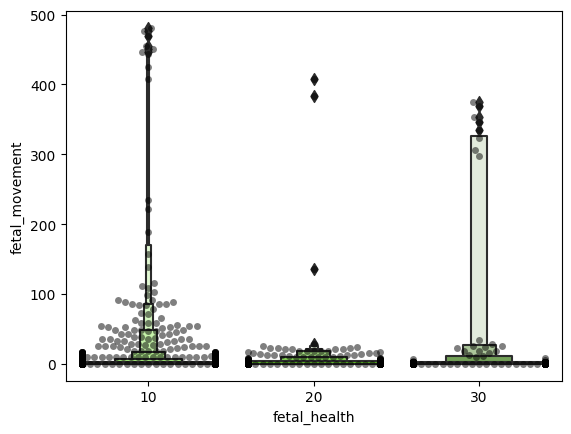

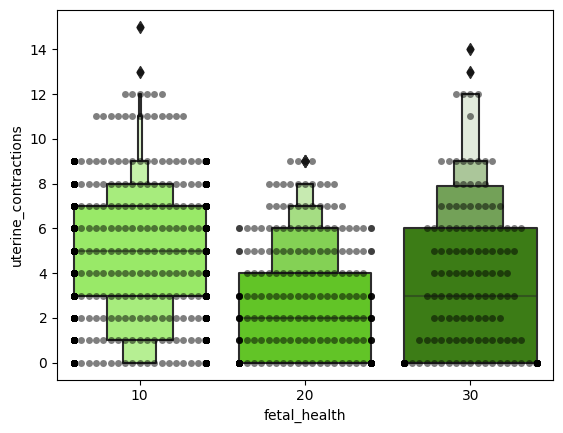

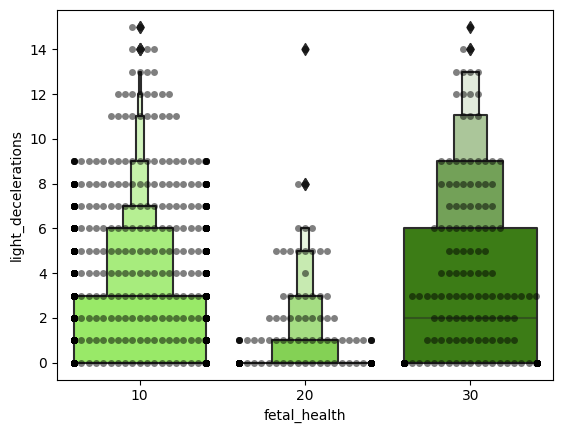

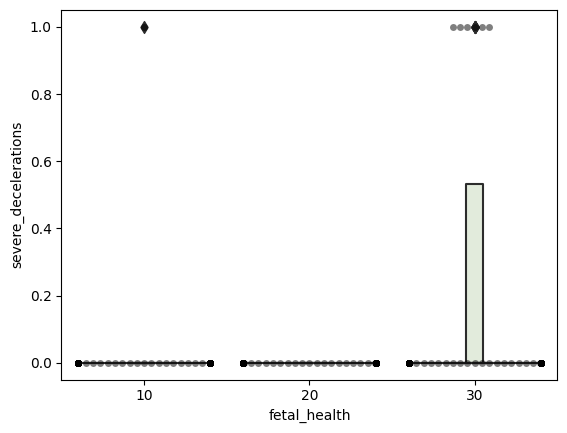

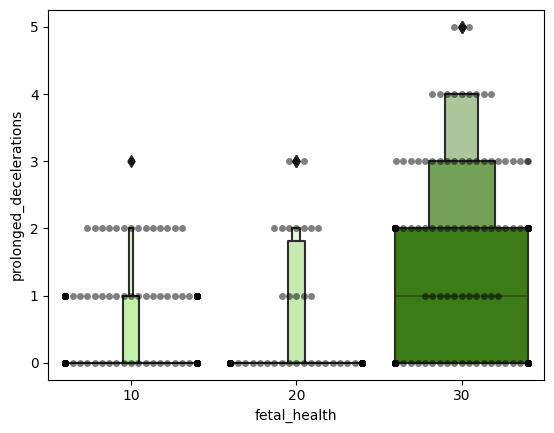

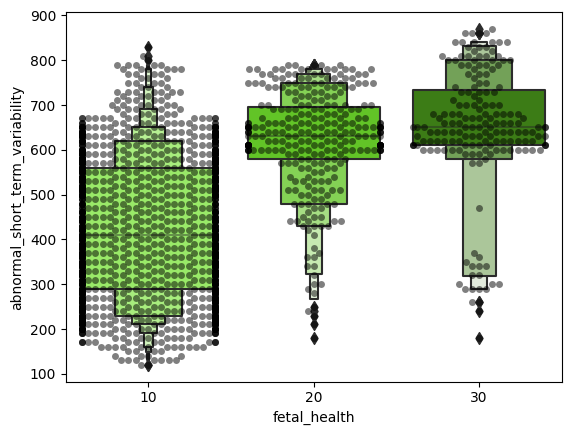

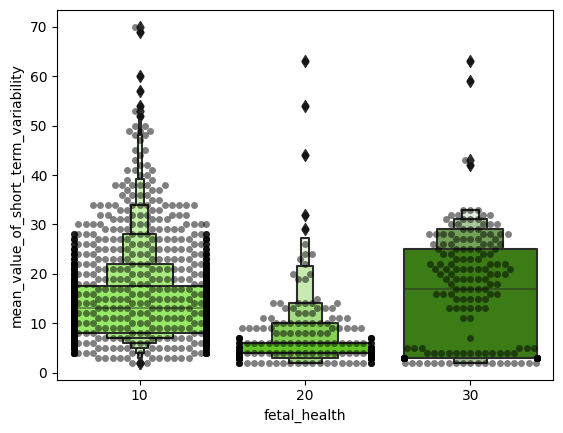

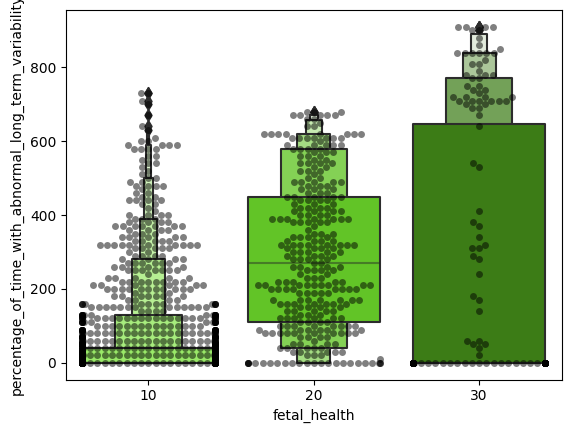

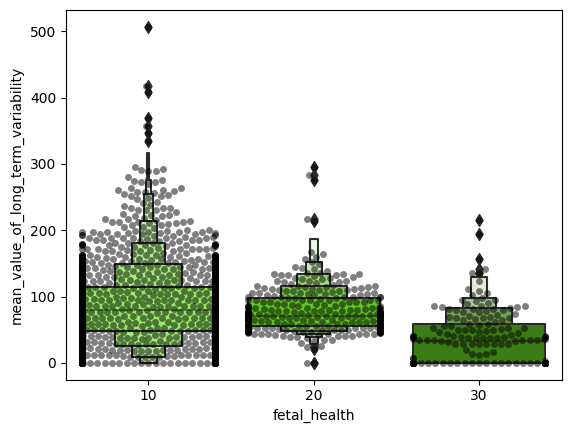

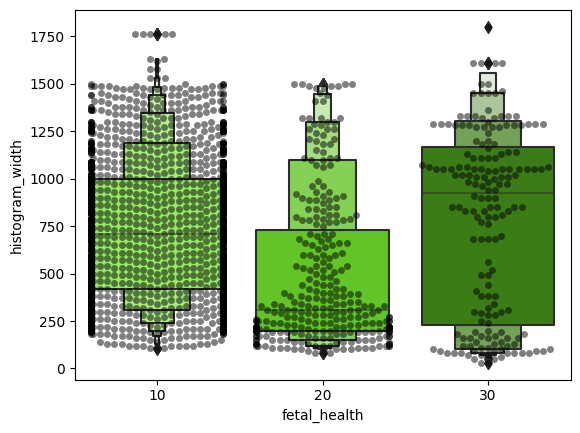

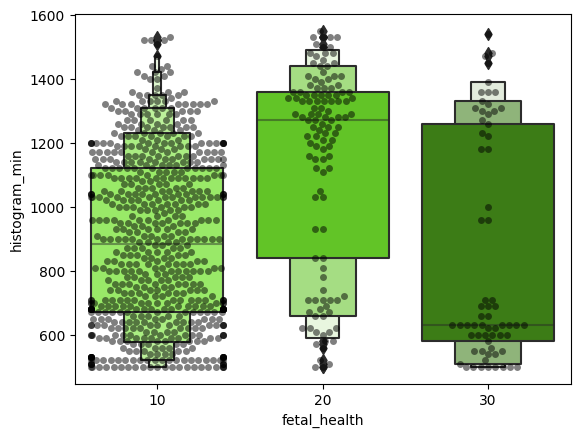

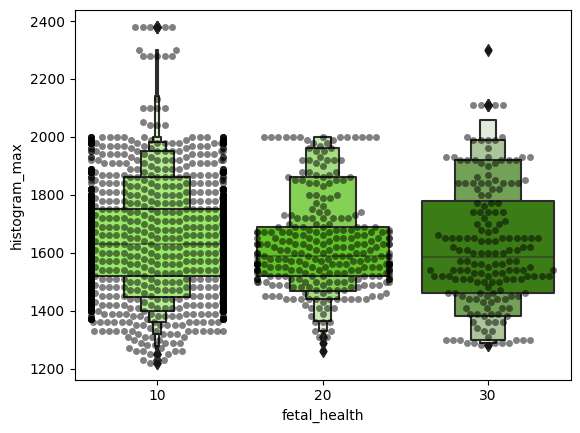

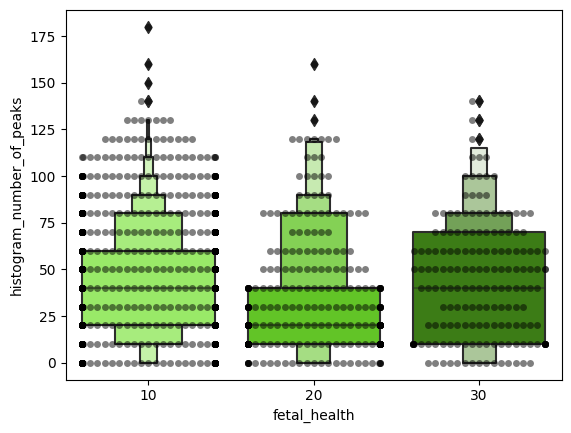

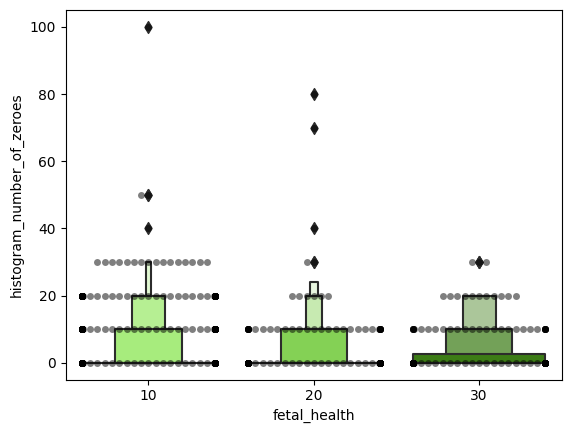

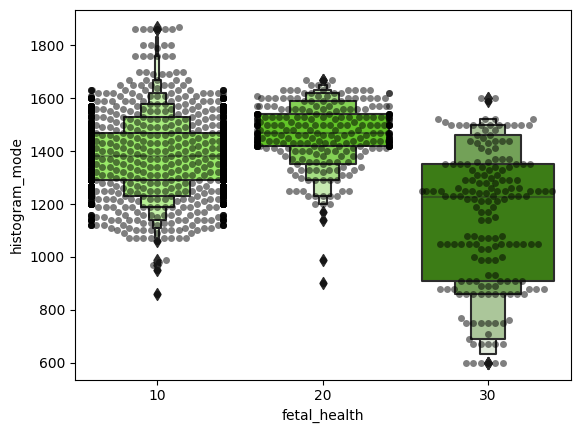

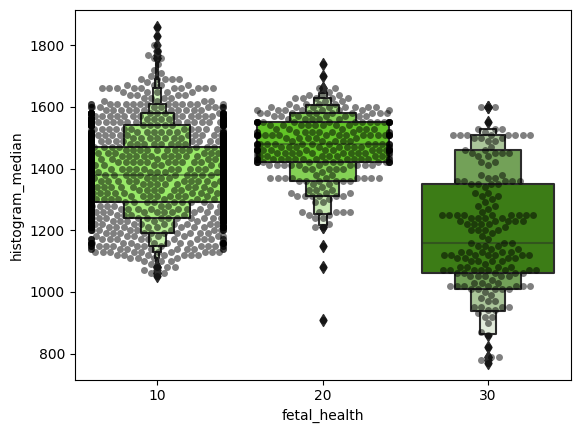

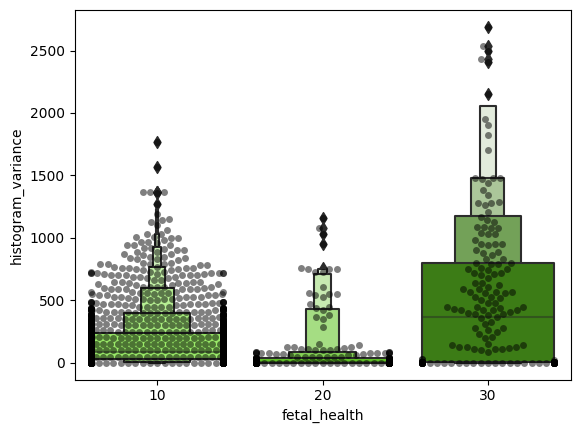

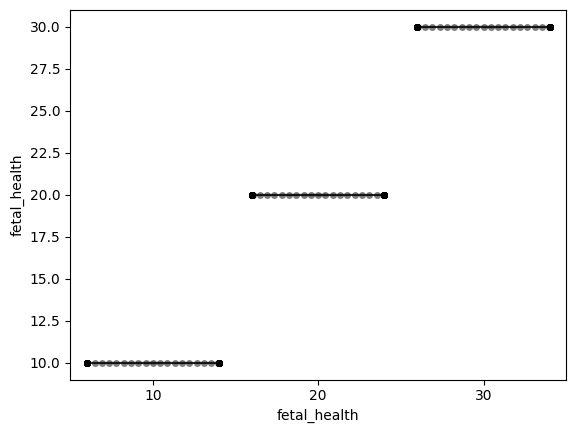

In [ ]:
for i in data.columns:
    sns.swarmplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["fetal_health"], y=data[i], palette=colours)
    plt.show()

I spotted outliers on our dataset. However, it is not a good idea to remove them yet as it may lead to overfitting. I make this consideration on the fact that outliers, with a high probability, aren't typos or errors in the dataset. Though we may end up with better statistics. A good idea could be to standardize only the columns containing too many outliers.

### Correlation between features

Let us evaluate the correlation matrix.

<AxesSubplot: >

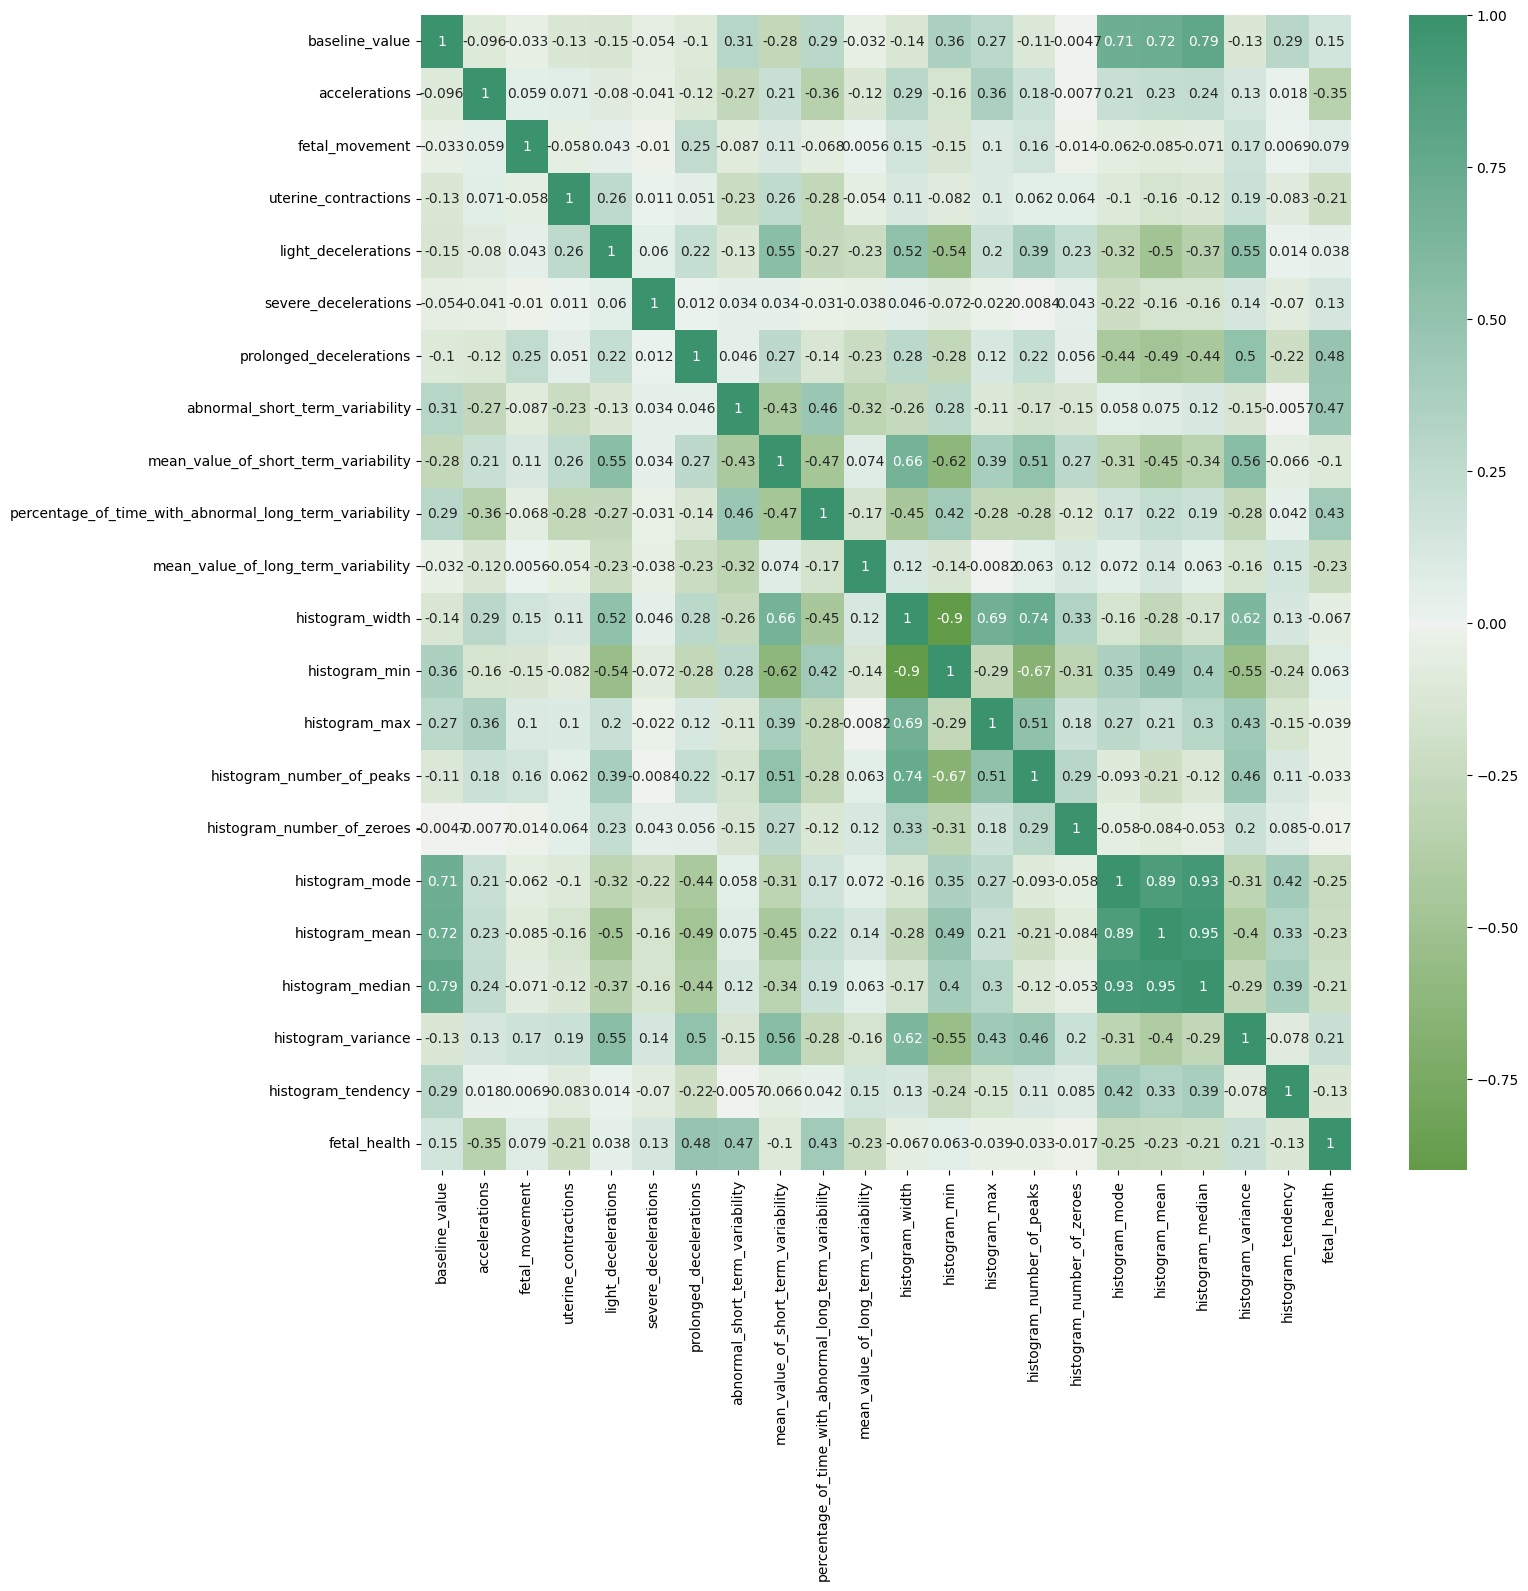

In [292]:
corrmat= data.corr()
plt.figure(figsize=(15,15))  
cmap = sns.diverging_palette(120, 150, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Based on the correlation matix, we can see that the features 'prolonged_decelerations', 'abnormal_short_term_variability' and 'percentage_of_time_with_abnormal_long_term_variability' have a high correlation with our target column 'fetal_health'. Hence we can analyze them singularly
Features, "fetal_movement", "light_decelerations", "histogram_width", "histogram_max", "histogram_number_of_zeroes", "histogram_number_of_peaks",  shows correlation less than the |0.1| hence, can be dropped off before feeding in to the algorithm. However, after training the dataset without those columns, the performance was really low due to insufficient data, hence I decided to keep them.

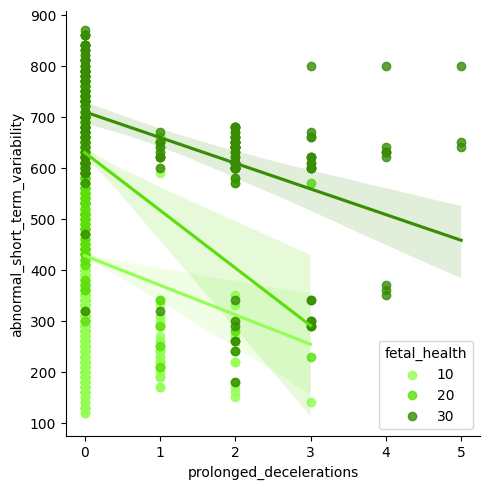

In [293]:
#Prolonged Decelerations Vs Abnormal Short Term Variability

sns.lmplot(data =data,x="prolonged_decelerations",y="abnormal_short_term_variability",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

In [294]:
#Abnormal Short Term Variability Vs Percentage Of Time With Abnormal Long Term Variability

sns.lmplot(data =data,x="abnormal_short_term_variability",y="percentage_of_time_with_abnormal_long_term_variability",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

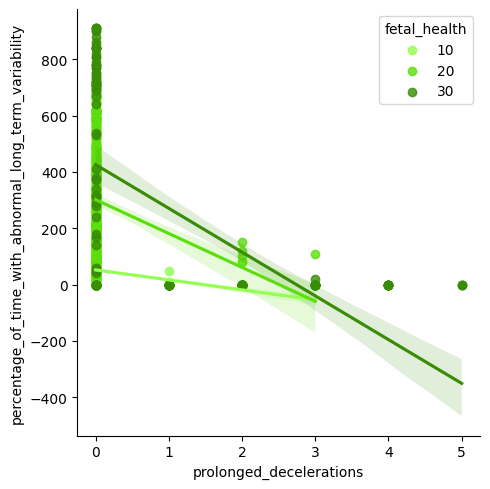

In [295]:
#Prolonged Decelerations Vs Percentage Of Time With Abnormal Long Term Variability

sns.lmplot(data =data,x="prolonged_decelerations",y="percentage_of_time_with_abnormal_long_term_variability",palette=colours, hue="fetal_health",legend_out=False)
plt.show()

The plot shows the range of the feature attributes. All the features are in different ranges. To fit this in a model we must scale it to the same range.

In [296]:
shades =["#94FE53","#5CDE0D","#388D05","#489A16", "#8ABC6C"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = data,palette = shades)
plt.xticks(rotation=90)
plt.show()

## Model selection and Training

Now I divide the dataset into training and testing subsets, removing also the column of 'histogram_max', which is the one with the grater amount of missing values

In [297]:
# Split dataFrame into X and y
y = data['fetal_health']    
X = data.drop(['fetal_health', 'histogram_max'], axis=1)
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [298]:
X_train

baseline_value  accelerations  fetal_movement  uterine_contractions  \
417             1370              1               0                     1   
1747            1340             11               0                     1   
425             1560              0               2                     5   
1059            1270              0               0                     9   
358             1330              0               9                     3   
...              ...            ...             ...                   ...   
1970            1380              5               0                     5   
1175            1260              4               0                     6   
255             1270              7               0                     7   
318             1440              0              22                     0   
1156            1220              7               0                     0   

      light_decelerations  severe_decelerations  prolonged_decelerations  \
417                     0                     0                        0   
1747                    4                     0                        0   
425                     0                     0                        0   
1059                   11                     0                        0   
358                     0                     0                        0   
...                   ...                   ...                      ...   
1970                    0                     0                        0   
1175                    0                     0                        0   
255                     5                     0                        0   
318                     0                     0                        0   
1156                    3                     0                        0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
417                               680                                     4   
1747                              560                                    14   
425                               530                                     6   
1059                              170                                    28   
358                               600                                     5   
...                               ...                                   ...   
1970                              590                                     8   
1175                              290                                    13   
255                               140                                    33   
318                               740                                     3   
1156                              230                                    17   

      percentage_of_time_with_abnormal_long_term_variability  \
417                                                 470        
1747                                                  0        
425                                                  60        
1059                                                  0        
358                                                 140        
...                                                 ...        
1970                                                  0        
1175                                                  0        
255                                                   0        
318                                                 560        
1156                                                  0        

      mean_value_of_long_term_variability  histogram_width  histogram_min  \
417                                    58            650.0           1350   
1747                                    0           1010.0            860   
425                                   108              NaN           1410   
1059                                   37            810.0            760   
358                                   114            800.0       

In [299]:
y_train

417     20
1747    10
425     10
1059    10
358     20
        ..
1970    10
1175    10
255     10
318     20
1156    10
Name: fetal_health, Length: 1700, dtype: int64

The construction of te pipeline consistes of a combination of the different possible models for the regular columns, while for the ones containing missing values I applied a SimplerImputer with the strategy 'mean'

In [300]:
# Define the columns that contain missing values
missing_cols = [col for col in X_train.columns if X_train[col].isnull().any()]

# Define the imputer
imputer = SimpleImputer(strategy='mean')

# Create the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', imputer, missing_cols),
        ('scaler', StandardScaler(), [col for col in X_train.columns if col not in missing_cols])
])
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

By printing the different scores for each model, it pops up which is the best one to use

In [302]:
for name, model in models.items():
    pipeline = IMBPipeline([
        ('preprocessor', preprocessor),
        ('upsampling', SMOTE()),
        ('dim_reduction', PCA(n_components=None)),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(name + ": {:.2f}%".format(score * 100))

Logistic Regression: 81.92%
K-Nearest Neighbors: 63.15%
Decision Tree: 84.74%
Random Forest: 90.61%
Gradient Boosting Classifier: 88.26%


In [303]:
pipeline.predict(X_test)

array([10, 20, 10, 10, 10, 10, 10, 10, 10, 10, 20, 20, 20, 30, 20, 10, 10,
       10, 10, 20, 10, 20, 10, 30, 20, 10, 10, 20, 10, 20, 30, 10, 10, 10,
       10, 30, 10, 10, 10, 10, 10, 10, 10, 10, 30, 10, 10, 10, 20, 10, 10,
       10, 10, 10, 10, 30, 10, 30, 10, 10, 10, 20, 10, 10, 20, 10, 10, 30,
       30, 10, 20, 20, 10, 10, 10, 10, 20, 10, 20, 10, 10, 30, 20, 20, 10,
       10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 20, 10, 10, 10, 10, 10, 10,
       10, 10, 20, 10, 10, 10, 20, 10, 10, 30, 10, 10, 10, 10, 10, 20, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 20,
       10, 10, 10, 10, 10, 30, 20, 10, 10, 10, 20, 10, 20, 10, 30, 20, 10,
       10, 10, 10, 10, 10, 10, 10, 30, 10, 10, 10, 10, 20, 10, 10, 10, 10,
       10, 10, 20, 10, 20, 30, 10, 10, 10, 10, 10, 10, 30, 10, 10, 20, 10,
       20, 10, 10, 10, 20, 10, 30, 10, 10, 10, 10, 10, 20, 20, 10, 30, 10,
       10, 20, 20, 10, 20, 10, 20, 10, 10, 20, 10, 10, 20, 10, 30, 20, 30,
       30, 10, 10, 10, 10

Random Forest classifier performs best with my dataset with respect to the others.

In [304]:
final_transformation =  IMBPipeline([
        ('preprocessor', preprocessor),
        ('upsampling', SMOTE()),
        ('dim_reduction', PCA(n_components=None)),
        ('classifier', RandomForestClassifier())
    ])
final_transformation.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer', SimpleImputer(),
                                                  ['histogram_width',
                                                   'histogram_number_of_peaks']),
                                                 ('scaler', StandardScaler(),
                                                  ['baseline_value',
                                                   'accelerations',
                                                   'fetal_movement',
                                                   'uterine_contractions',
                                                   'light_decelerations',
                                                   'severe_decelerations',
                                                   'prolonged_decelerations',
                                                   'abnormal_short_term_variability',
                                                   'mea...ort_term_variability',
                                                   'percentage_of_time_with_abnormal_long_term_variability',
                                                   'mean_value_of_long_term_variability',
                                                   'histogram_min',
                                                   'histogram_number_of_zeroes',
                                                   'histogram_mode',
                                                   'histogram_mean',
                                                   'histogram_median',
                                                   'histogram_variance',
                                                   'histogram_tendency'])])),
                ('upsampling', SMOTE()), ('dim_reduction', PCA()),
                ('classifier', RandomForestClassifier())])

In [306]:
print(f"Random Forest Classifier Score: {round(pipeline.score(X_test, y_test), 2)}")
pred_rfcl = final_transformation.predict(X_test)

Random Forest Classifier Score: 0.88


It's now necessary to split again the train test with the validation set in K-fold = 8

In [307]:
# Cross validate Random Forest Classifier model
scores_rfcl = cross_val_score(final_transformation, X_train, y_train, cv = 8, n_jobs = 2, scoring = "accuracy")

print(f"CV scores for Random Forest Classifier model:\n{scores_rfcl}")
print(f"CV Mean score: {round(scores_rfcl.mean(), 2)}")

CV scores for Random Forest Classifier model:
[0.91549296 0.91549296 0.89671362 0.92488263 0.9245283  0.91981132
 0.86792453 0.89622642]
CV Mean score: 0.91


Using Randomized Grid Search I'm able to identify, with 'accuracy', the scores by the best estimators and the configuration of the best estimator

In [308]:
parameters = {
    'classifier__n_estimators': [50, 100, 200, 300, 400],
    'classifier__max_depth': [1, 3, 5, 7, 9],
    'classifier__min_samples_split': [2, 4, 6, 8, 10]
}

In [309]:
rs = RandomizedSearchCV(estimator=final_transformation,
                        param_distributions=parameters,
                        scoring='accuracy',
                        refit=True,
                        n_iter=10,
                        cv=2,
                        random_state=1,
                        n_jobs=-1,
                        verbose= 1)
rs = rs.fit(X_train, y_train)
print(f'Best score got by the best estimator: {rs.best_score_}')
print(f'Configuration for the best estimator/classifier: {rs.best_params_}')

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best score got by the best estimator: 0.8935294117647059
Configuration for the best estimator/classifier: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 8, 'classifier__max_depth': 9}


In [314]:
scores = cross_validate(rs, X_train, y_train, scoring='accuracy', cv = 5, return_estimator=True, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END ......................................., score=0.897 total time=  16.0s
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s remaining:    0.0s
[CV] END ......................................., score=0.891 total time=  16.0s
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.1s remaining:    0.0s
[CV] END ......................................., score=0.885 total time=  18.1s
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END ......................................., score=0.882 total time=  16.1s
Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END ......................................., score=0.865 total time=  16.1s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elaps

Evaluate it on the unseen data (the test set)

In [315]:
accuracy_score(y_test, rs.best_estimator_.predict(X_test))

0.8685446009389671

In [316]:
# Getting score on the Test set
pred_rfcl = final_transformation.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfcl)
print(f" Testing Score of the model is {accuracy}")

 Testing Score of the model is 0.8967136150234741


In [317]:
# Getting the Classification report 
print(classification_report(y_test, pred_rfcl))

              precision    recall  f1-score   support

          10       0.95      0.94      0.94       324
          20       0.68      0.72      0.70        60
          30       0.84      0.86      0.85        42

    accuracy                           0.90       426
   macro avg       0.82      0.84      0.83       426
weighted avg       0.90      0.90      0.90       426



Printing the confusion matrix 

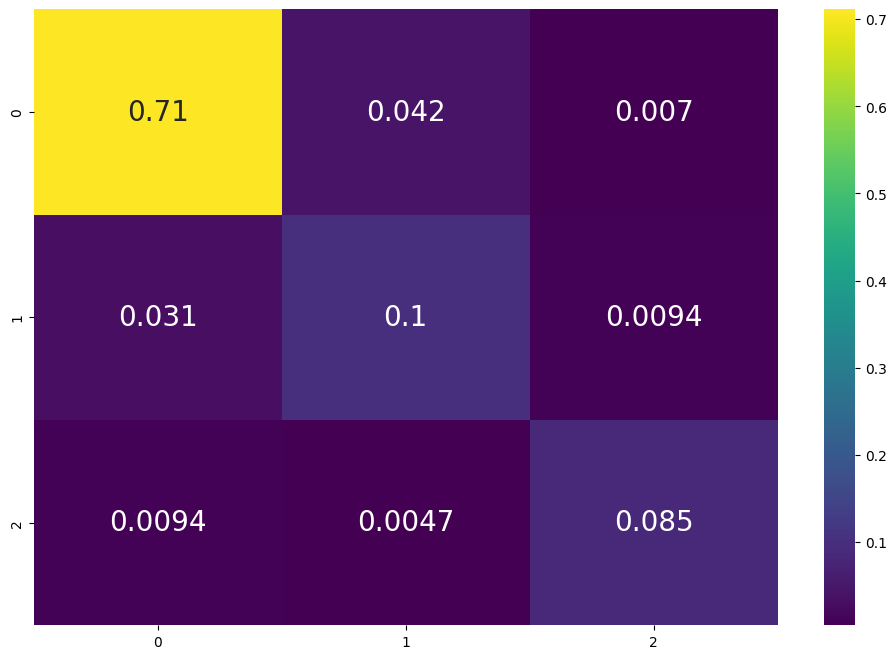

In [318]:
# Getting the Confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_rfcl)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap='viridis',annot = True, annot_kws = {'size':20})
plt.show()

Printing the learning curve

In [319]:
rfcl = rs.best_estimator_

In [320]:
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold
train_sizes, train_scores, test_scores = learning_curve(rfcl,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 2,
                                                       n_jobs = -1,
                                                       scoring = 'accuracy',
                                                       shuffle = False)

In [321]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='blue', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])

(0.6, 1.03)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=448e7862-47da-48af-8e0f-afb1f0ef67ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>